# Data Collection 

In [3]:
# libraries for data collection
import selenium
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from bs4 import BeautifulSoup 
import pandas as pd
driver_path = "C:\\Users\\User\\Downloads\\chromedriver_win32\\chromedriver.exe"

In [4]:
driver = selenium.webdriver.Chrome(driver_path)
driver.get("https://sg.carousell.com/categories/electronics-7/?sc=12020814220b0a057072696365120208012a120a0b636f6c6c656374696f6e7322030a01373a0408bbe17242037765624a02656e&sort_by=price%2Cascending")

In [5]:
PATIENCE_TIME = 60
while True:
    try:
        loadMoreButton = driver.find_element_by_css_selector("#root > div > div.SlZgBjnLiz > div > div.dLZJAZVTAg > main > div._2RJeLsMmpi > button")
        time.sleep(2)
        loadMoreButton.click()
        time.sleep(5)
    except Exception as e:
        print(e)
        break
print("Complete")
time.sleep(10)

In [13]:
# electronics = driver.page_source
# soup = BeautifulSoup(electronics)

In [58]:
# create a new file and save whatever that has been scraped
electronics_listings = open("electronics.txt", "w", encoding="utf-8")
electronics_listings.write(soup.text)
electronics_listings.close() 

In [61]:
# save the website after all the scraping 
carousell_electronics = open("carousell_electronics.html", "w", encoding="utf-8")
carousell_electronics.write(electronics)
carousell_electronics.close()

In [7]:
dict_to_convert = {
    "Seller" : [],
    "Product" : [],
    "Price" : [], 
    "Quality" : [],
    "Likes" : [], 
    "Comments" : []
}
    

In [8]:
CE = open("carousell_electronics.html", "r", encoding = "utf-8")
soup = BeautifulSoup(CE, "html.parser")

In [9]:
sellers = soup.find_all("div", class_="An6bc8d5sQ _9IlksbU0Mo _2t71A7rHgH")

In [10]:
for seller in sellers:
    seller_name = seller.find("p", class_="_1gJzwc_bJS _2NNa9Zomqk mT74Grr7MA nCFolhPlNA lqg5eVwdBz uxIDPd3H13 _30RANjWDIv")
    product = seller.find("p", class_="_1gJzwc_bJS _2rwkILN6KA mT74Grr7MA nCFolhPlNA lqg5eVwdBz uxIDPd3H13 _30RANjWDIv")
    price = seller.find("p", class_="_1gJzwc_bJS _2rwkILN6KA mT74Grr7MA nCFolhPlNA lqg5eVwdBz _19l6iUes6V _3k5LISAlf6")
    likes = seller.find("span", class_="_1gJzwc_bJS _2rwkILN6KA mT74Grr7MA _2m1WFlGyTw lqg5eVwdBz _19l6iUes6V _30RANjWDIv")
    comments_and_quality = seller.find_all("p", class_="_1gJzwc_bJS _2rwkILN6KA mT74Grr7MA nCFolhPlNA lqg5eVwdBz _19l6iUes6V _30RANjWDIv")
    comments = comments_and_quality[0]
    quality = comments_and_quality[1]
    dict_to_convert["Seller"].append(seller_name.text)
    dict_to_convert["Product"].append(product.text)
    dict_to_convert["Price"].append(price.text)
    dict_to_convert["Quality"].append(quality.text)
    dict_to_convert["Likes"].append(likes.text)
    dict_to_convert["Comments"].append(comments.text)
    

In [11]:
df = pd.DataFrame(dict_to_convert)

In [12]:
df.to_csv("carousell_electronics.csv", index=False, header=True)

# Data Cleaning 

In [1]:
# libraries for data cleaning
import pandas as pd
import numpy as np 

In [3]:
# i renamed the "caoursell_electronics.csv to carousell_1 and placed it under my Data folder"
df = pd.read_csv("data/carousell_1.csv")

In [160]:
df.shape

(4531, 6)

In [161]:
df.dtypes
# price and likes need to be changed to int 

Seller      object
Product     object
Price       object
Quality     object
Likes       object
Comments    object
dtype: object

In [162]:
# remove advertisements 
df = df[df["Comments"] != "Spotlight"]

In [163]:
df.shape
# 839 advertisements removed!

(3692, 6)

In [164]:
# df["Price"].unique()
# Useful for finding all the oddballs 

In [165]:
# clean money and convert to floats 
def get_money(money):
    if money == "FREE":
        return 0.0
    if "(" in money:
        money = money.split("(")[0].strip()
    money = money[2:]
    money = money.replace(",", "")
    return float(money)
df["Price"] = df["Price"].apply(get_money)

In [166]:
# df["Likes"].unique()
# Found and need to remove "\xa0"

In [167]:
df = df[df["Likes"] != "\xa0"]

In [168]:
df["Likes"] = df["Likes"].astype(int)
df.dtypes
# Price and Likes cleaned! 

Seller       object
Product      object
Price       float64
Quality      object
Likes         int32
Comments     object
dtype: object

In [169]:
# Now to look at other categories 
print(df[df["Quality"].isin(["New", "Used"])].shape)
print(df.shape)
print("Number of NaN: {}".format(len(df[df["Quality"].isnull()])))

(2647, 6)
(3109, 6)
Number of NaN: 37


In [170]:
# check if there's any product that's not properly listed
# df[df["Product"].isnull()]

In [171]:
# keep only the new and used
df = df[df["Quality"].isin(["New", "Used"])]

In [175]:
def new_used(quality):
    if quality == "New":
        return 1
    else:
        return 0

In [176]:
df["Quality"] = df["Quality"].apply(new_used)
df.head()

,Seller,Product,Price,Quality,Likes,Comments
1,tonicboy,BN AV Cable,0.0,1,14,Others
2,andysky,Power Adaptor 8 USB Port,0.0,1,20,Preorder ✨✨✨✨✨ Selling at $39 Registered ma...
3,clearsound,Zu Audio Megular Component Video Cable,0.0,0,2,"Zu Audio 1.5m component video cable, in good c..."
6,semplice,Baymax Room Light,0.0,1,25,Room accessories for decoration
7,shamurai.san,Sony Original Tablet Power Adaptor,0.0,0,1,Selling sony power adapter table working condi...


In [177]:
df.to_csv("data/carousell_2.csv", index=False, header=True)

In [ ]:
# # Is there anyone who has a lot to sell? If so, who? 
# print("Unique sellers: {}".format(len(df["Seller"].unique())))
# print("Total sellers: {}".format(len((df["Seller"]))))
# groupby_sellers = df.groupby("Seller").size().reset_index()
# groupby_sellers.columns = ["Seller", "Number Sold"]
# groupby_sellers.sort_values("Number Sold", ascending = False)

# Exploratory Data Analysis:
### Questions
1) Anyone selling repeatedly? If so, who? 
### Univariate analysis: 
1) Variation of prices and likes
2) What kind of products are being sold the most? What's the average price of these products sold? 
### Multivariate analysis: 
1) Relationship between number of likes and old/newness of product 
2) Relationship between price and likes 
3) Relationship between type of product being sold and number of likes 
4) Relationship between type of product being sold and quality 

In [85]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import numpy as np 
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.corpus import stopwords
import scipy.sparse

In [2]:
df = pd.read_csv("data/carousell_2.csv")

In [3]:
df.head()

,Seller,Product,Price,Quality,Likes,Comments
0,tonicboy,BN AV Cable,0.0,1,14,Others
1,andysky,Power Adaptor 8 USB Port,0.0,1,20,Preorder ✨✨✨✨✨ Selling at $39 Registered ma...
2,clearsound,Zu Audio Megular Component Video Cable,0.0,0,2,"Zu Audio 1.5m component video cable, in good c..."
3,semplice,Baymax Room Light,0.0,1,25,Room accessories for decoration
4,shamurai.san,Sony Original Tablet Power Adaptor,0.0,0,1,Selling sony power adapter table working condi...


In [4]:
def lower_and_remove_nonwords(product):
    product = product.lower()
    product = re.sub("[?*!<>%$)@(#\]\[]", "", product) 
    return product

In [5]:
df["Product"] = df["Product"].apply(lower_and_remove_nonwords)

In [6]:
vectorizer = TfidfVectorizer(max_features = int(0.2*5312) , stop_words="english") 
# is there a way to not hard code the max_features out?

In [7]:
response = vectorizer.fit_transform(df["Product"])

In [8]:
print(response)

  (0, 244)	0.4569593072427573
  (0, 172)	0.6357252603906284
  (0, 215)	0.6221266630080139
  (1, 732)	0.52771084844918
  (1, 992)	0.3715128232011981
  (1, 133)	0.6369606290614017
  (1, 735)	0.4216404151072634
  (2, 1006)	0.49773597458674235
  (2, 300)	0.6336991865573218
  (2, 166)	0.42731785792312277
  (2, 244)	0.40998010788179495
  (3, 575)	0.5887655021624492
  (3, 803)	0.8083038930151203
  (4, 927)	0.48568835215281475
  (4, 686)	0.41665308615118174
  (4, 867)	0.4143977552450701
  (4, 133)	0.5396176068403166
  (4, 735)	0.35720354032337887
  (5, 24)	0.27709108702684887
  (5, 268)	0.5402881061796028
  (5, 372)	0.4037445832014556
  (5, 399)	0.5402881061796028
  (5, 784)	0.228283414187623
  (5, 492)	0.25469453677451814
  (5, 330)	0.2437329305029062
  :	:
  (2639, 28)	0.6070406521187702
  (2640, 458)	0.4187258098636036
  (2640, 5)	0.40355321017469914
  (2640, 111)	0.3914381232997901
  (2640, 445)	0.3768784524791973
  (2640, 673)	0.4187258098636036
  (2640, 254)	0.3063866553670542
  (2640, 4

In [9]:
feature_names = vectorizer.get_feature_names()

In [10]:
temp = pd.DataFrame.sparse.from_spmatrix(response)
temp.columns = feature_names
temp.head()

,00,10,100,1000xm3,100w,1060,1070,1070ti,1080,1080p,...,xs,xt,xtreme,yamaha,year,yellow,yoga,youtube,zenbook,zotac
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print(feature_names)

['00', '10', '100', '1000xm3', '100w', '1060', '1070', '1070ti', '1080', '1080p', '10m', '11', '12', '120', '120gb', '120mm', '128gb', '12v', '13', '14', '144hz', '15', '150', '16', '1600mhz', '16gb', '17', '18650', '1tb', '20', '200', '2011', '2012', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2060', '2070', '2080', '21', '2130', '22', '2280', '23', '24', '240gb', '24v', '25', '250gb', '256', '256gb', '26', '2666mhz', '27', '2gb', '2m', '2mp', '2nd', '2tb', '30', '300', '3000', '300mbps', '3100', '32', '3200mhz', '32gb', '35', '3500', '3580', '360', '3600', '38mm', '3d', '3gb', '3rd', '40w', '42mm', '44mm', '480gb', '4ch', '4g', '4gb', '4ghz', '4k', '4k60hz', '50', '500', '500gb', '5050', '512', '512gb', '520', '5700', '5a', '5inch', '5m', '5mm', '5th', '5v', '5w', '60', '600w', '60w', '63', '64gb', '6gb', '750w', '80', '800', '8565u', '868l', '8gb', '8th', 'a1706', 'a1707', 'a1932', 'a1990', 'a2159', 'ab6', 'ac', 'ac88u', 'access', 'accessories', 'acer', 'acousti

In [12]:
product_dict = {
    "cables/adapters/switches" : 
    ["cable", "DAC", "plug", "socket", "adapter", "adapters", "adaptor", "switch", "switches", "cord"],
    "air" : 
    ["aircon", "dehumidifier", "purifier", "fan", "cooling", "fans"],
    "lights" : 
    ["light", "flashlight", "lamp", "lights", "lumens"],
    "covers/cases" : 
    ["case", "casing", "itx", "sleeve", "cover", "cover"],
    "printers" : 
    ["printer", "cartridge", "ink", "canon", "brother", "toner", "officejet"],
    "computers/parts" : 
    ["air", "macbook", "zenbook", "laptop", "laptops", "elitebook", "chromebook", "notebook",
    "blade", "thinkpad", "aftershock", "pc", "pcs", "zotac", "optiplex", 
    "psu", "desktop", "imac", "geforce", "gtx", "card", "ryzen", "amd", "graphic", "graphics", "radeon",
    "rx580", "msi", "rtx", "hard", "disk", "ssd", "hdd", "sandisk", "sata", "sata3", "seagate", "evo", 
    "motherboard", "asrock", "motherboards", "b450", "b450m", "raspberry", "x570", "strix", "gigabyte",
    "msi", "xps", "nvidia", "ue", "intel", "ddr3", "ddr4", "dd6", "corsair", "aspire"],
    "audio_visual" : 
    ["ipod", "player", "speaker", "speakers", "beoplay", "soundbar", "soundlink", 
    "subwoofer", "pre", "amp", "preamp", "amplifier", "marantz", "bar", "jbl", "tube", "promedia",
    "sound", "sonos", "receiver", "tester", "monitor", "monitors", "screen", "screens", "tempered",
    "projector", "vr", "microphone", "microphones", "tv", "hdtv", "radio", "radios", "hifi", "boom", 
    "av", "mic", "beyerdynamic", "camera", "cctv", "gopro", "tripod", "webcam", "headphones", "headphone",
    "marshall", "earphones", "earphone", "earpiece", "airpod", "airpods","campfire", "audiophile", "earbuds",
    "earbud", "airdots", "akg", "audio", "beats", "buds", "cancelling", "ear", "headset", "sennheiser", 
    "soundsport", "1000xm3", "headset", "iem", "jabra", "buds", "blackpods"],
    "tablets/phones" : 
    ["ipad", "tablet", "tablets", "iphone", "s1", "s20", "s7", "s8", "s8", "s9", "smartphone", "phone"],
    "gaming_consoles" : 
    ["xbox", "playstation", "nintendo", "ps4", "ps3", "ps", "controller", "controllers"],
    "keyboards/mouse/chargers" : 
    ["charge", "charger", "charging", "keyboard", "keycaps", "logitech", "mouse"],
    "remotes/batteries" : 
    ["battery", "batteries", "remote", "remotes"],
    "time" : 
    ["clock", "watch", "watches"],
#     "others" : 
#     ["shaver", "telescope", "thermometer", "guitar", "vacuum", "dyson", "walkie", "talkie", "fitbit",
#     "washing", "recorder", "bag", "bottle", "bottles", "comb", "antenna", "lock", "pump", "wifi", "ax3000",
#     "router", "massage", "massager"]
    
}

In [13]:
types = []
for product in df["Product"]:
    product_type = ""
    for word in product.split(" "):
        if word in feature_names and word not in product_type:
            product_type += word + " "
    product_type = product_type.rstrip()
    types.append(product_type)

In [14]:
def search_key(query, dictionary):
    for k,v in dictionary.items():
        for values in v: 
            if query == values:
                return k
    return " "

In [15]:
converted_list = []
for product_type in types:
    product_type = product_type.split(" ")
    filtered_product = " "
    for word in product_type:
        key = search_key(word, product_dict)
        if key not in filtered_product:
            filtered_product += key + " "
    converted_list.append(filtered_product)

In [16]:
# converted_list

In [17]:
df_convert = pd.DataFrame(list(zip(types, converted_list)))
df_convert.columns = ["before", "after"]
df_after_empty = df_convert[df_convert["after"] == " "]
# for i in range(len(df_after_empty.index)):
#     print(df_after_empty.iloc[i])
# df_before_empty = df_convert[df_convert["before"] == ""]
# len(df_before_empty.index)
df_convert.head()


,before,after
0,bn av cable,audio_visual cables/adapters/switches
1,power adaptor usb port,cables/adapters/switches
2,audio component video cable,audio_visual cables/adapters/switches
3,room light,lights
4,sony original tablet power adaptor,tablets/phones cables/adapters/switches


In [18]:
def convert_empty_string(string):
    string = string.lstrip().rstrip()
    if string == " " or string == "":
        string = "others"
    return string

In [19]:
df_convert["after"] = df_convert["after"].apply(convert_empty_string)

In [20]:
# df_convert[df_convert["after"].str.contains("\s", regex=True)].to_csv("changing_cats.csv")

In [21]:
print("Amount converted: {}".format(sum(df_convert["after"] != " ")))
print("Amount blank: {}". format(sum(df_convert["after"] == " ")))
print("Percentage converted: {}".format(sum(df_convert["after"] != " ")/len(df_convert.index)*100))

Amount converted: 2647
Amount blank: 0
Percentage converted: 100.0


In [22]:
# df_convert[df_convert["after"].str.contains("\s", regex=True)]
# convert to csv and manually parse the data myself

In [23]:
df_after_manual = pd.read_csv("data/changing_cats.csv")

In [24]:
df_after_manual.columns = ["rows", "before", "after"]

In [25]:
# df_after_manual

In [26]:
def replace_values_by_index(index_num, col, new_value):
    col[index_num] = new_value
    return col

In [27]:
for n in range(len(df_after_manual["rows"])):
    row_num = df_after_manual.loc[n, "rows"]
    df_convert["after"] = replace_values_by_index(row_num, df_convert["after"], df_after_manual["after"].iloc[n])

In [28]:
df_convert.head()
# conversion successful!

,before,after
0,bn av cable,cables/adapters/switches
1,power adaptor usb port,cables/adapters/switches
2,audio component video cable,cables/adapters/switches
3,room light,lights
4,sony original tablet power adaptor,cables/adapters/switches


In [29]:
df["Category"] = df_convert["after"]

In [30]:
# df["Category"].unique()

In [31]:
def remove_space(string):
    string = string.lstrip().rstrip()
    return string
df["Category"] = df["Category"].apply(remove_space)

In [32]:
df["Category"].unique()
# must have missed changing some values. time to change them!

array(['cables/adapters/switches', 'lights', 'computers/parts',
       'audio_visual', 'others', 'covers/cases',
       'keyboards/mouse/chargers', 'printers', 'time',
       'remotes/batteries', 'air', 'tablets/phones', 'gaming_consoles',
       'computers/parts printers', 'computers/parts audio_visual',
       'tablets/phones covers/cases'], dtype=object)

In [33]:
df[df["Category"] == 'computers/parts printers']

,Seller,Product,Price,Quality,Likes,Comments,Category
356,yeooo1,limited few pcs - brand new canon original pri...,19.89,1,11,"Brand new in box, fresh stock *fast waiting ti...",computers/parts printers


In [34]:
df.loc[791, "Category"] = "audio_visual"
df.loc[890, "Category"] = "covers/cases"
df.loc[356, "Category"] = "computers/parts"

In [35]:
df["Category"].unique()
# all changed!

array(['cables/adapters/switches', 'lights', 'computers/parts',
       'audio_visual', 'others', 'covers/cases',
       'keyboards/mouse/chargers', 'printers', 'time',
       'remotes/batteries', 'air', 'tablets/phones', 'gaming_consoles'],
      dtype=object)

In [36]:
# df.to_csv("data/carousell_3.csv")

Q1 i) Anyone selling repeatedly? Probably. But who? 

newchapters

In [37]:
df_sellers = df.groupby("Seller").size().reset_index().rename(columns={0: "Number of sales"}).sort_values(by = "Number of sales", ascending=False)
df_sellers.head()
# Seems like newchapters is selling the most 

,Seller,Number of sales
1155,newchapters.,79
1332,readystocklistings,25
568,gamingspecialist,16
946,lastminutedeal,16
1492,sinsengcomponents,12


Q1 ii) Top 20 sellers? 

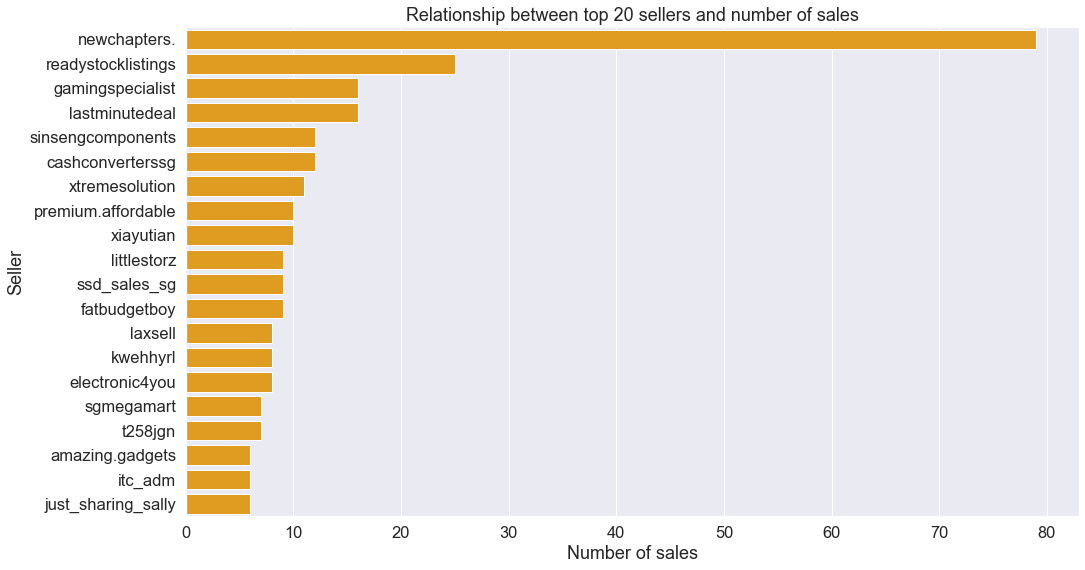

In [104]:
f = 1.5
sns.set(font_scale = f)
fig, ax = plt.subplots(figsize = (16,9))
sns.barplot(x = "Number of sales", y = "Seller", data = df_sellers.iloc[0:20], 
            color = "orange").set_title("Relationship between top 20 sellers and number of sales")
plt.show()

Q1 iii) What is the distribution of sales? 

Most sell between 0-5 goods 

In [39]:
df["Log Price"] = np.log1p(df["Price"])
df["Log Likes"] = np.log1p(df["Likes"])

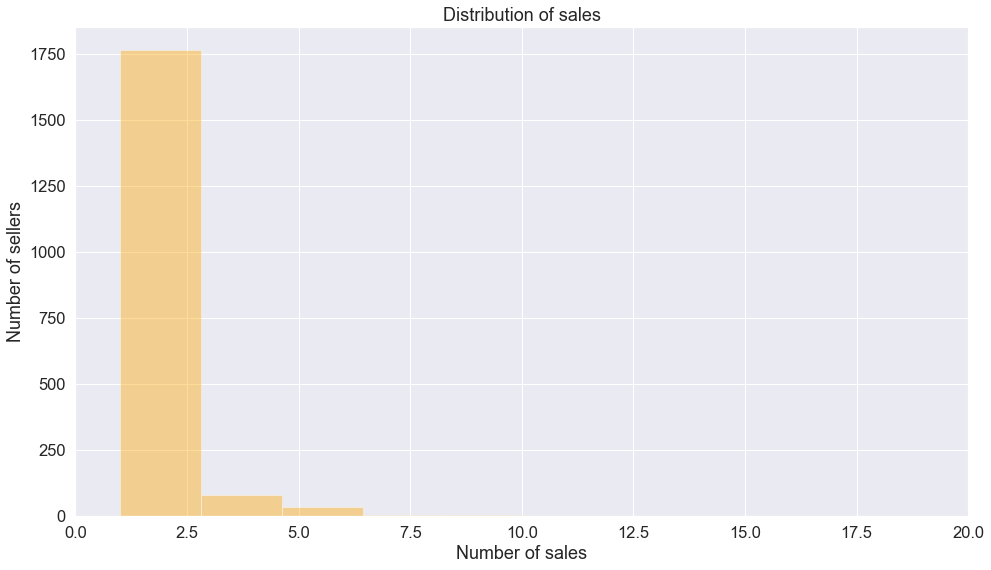

In [125]:
fig, ax = plt.subplots(figsize = (16,9))
sns.distplot(df_sellers["Number of sales"], kde=False, color = "orange").set_title("Distribution of sales")
ax.set_xlim(0, 20)
ax.set_ylabel("Number of sellers")
plt.show()

Q2 i) Type of product being sold the most? Audio visual

In [41]:
df_groupby_cat = df.groupby("Category").size().reset_index()

In [42]:
df_groupby_cat.columns = ["Category", "Number of items"]

In [58]:
df_groupby_cat = df_groupby_cat.sort_values(by = "Number of items", ascending = False)

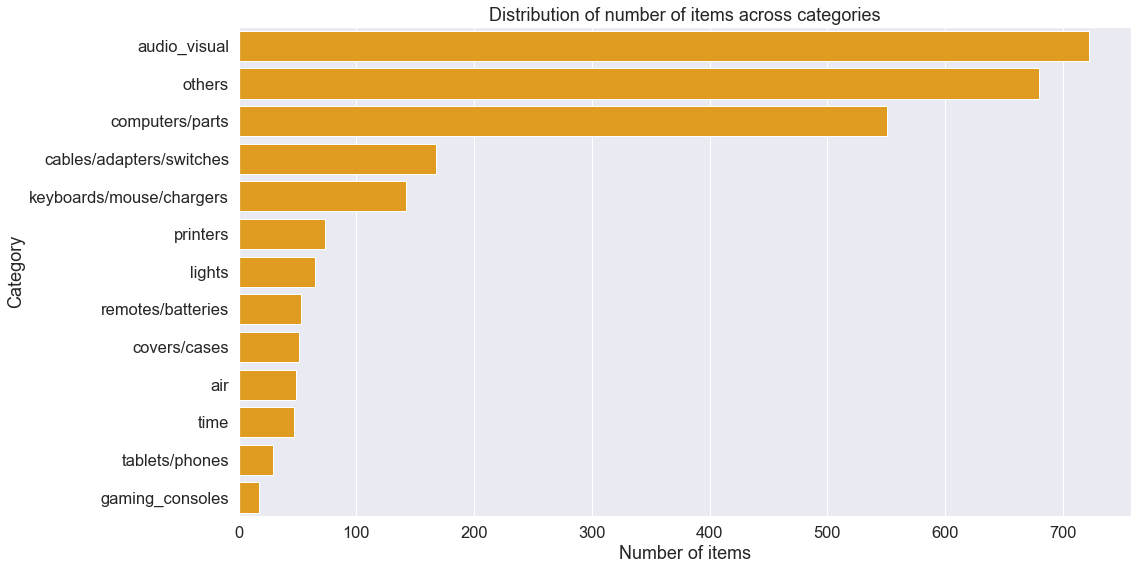

In [122]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.barplot(x = "Number of items", y = "Category", data = df_groupby_cat, 
            color = "orange").set_title("Distribution of number of items across categories")
plt.show()

Q2 ii) Variation of likes? 

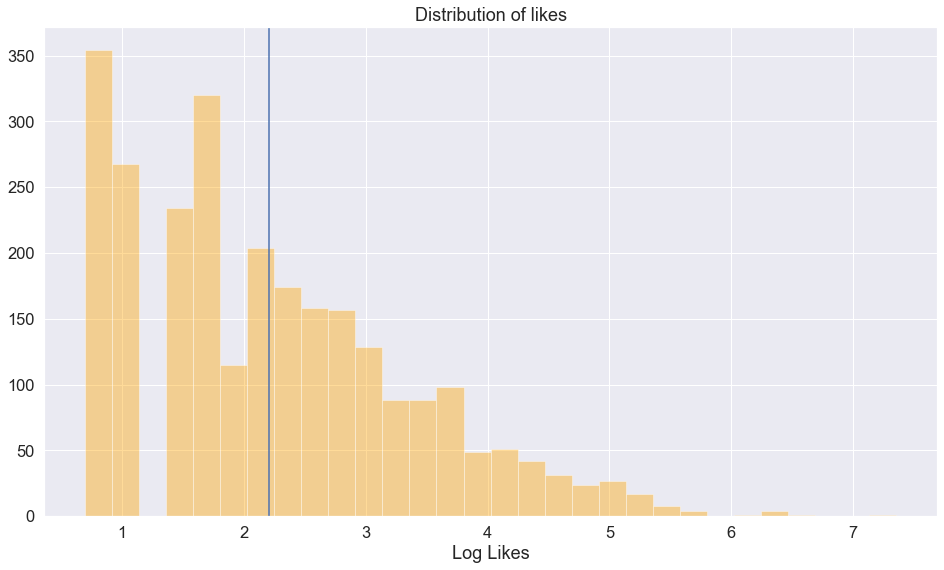

In [112]:
fig, ax = plt.subplots(figsize = (16,9))
sns.distplot(df["Log Likes"], color = "orange", 
             hist = True, kde = False).set_title("Distribution of likes")
ax.axvline(x = df["Log Likes"].mean())
plt.show()

Q2 iii) Variation of prices? 

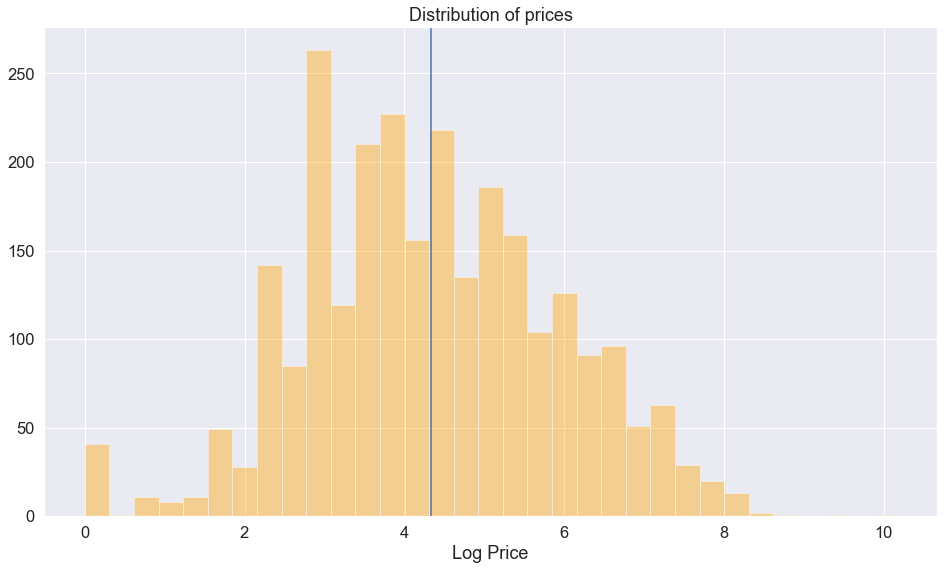

In [113]:
fig, ax = plt.subplots(figsize = (16,9))
sns.distplot(df["Log Price"], color = "orange", 
             hist = True, kde = False).set_title("Distribution of prices")
ax.axvline(x=df["Log Price"].mean())
plt.show()

3) Relationship between number of likes and old/newness of product

Analyse by total number of likes. Not surprising that more people like new stuff

In [47]:
df_quality = df.groupby("Quality").agg({"Likes" : "sum"})
df_quality = df_quality.reset_index()
df_quality["Quality"] = df_quality["Quality"].replace(0, "Old")
df_quality["Quality"] = df_quality["Quality"].replace(1, "New")

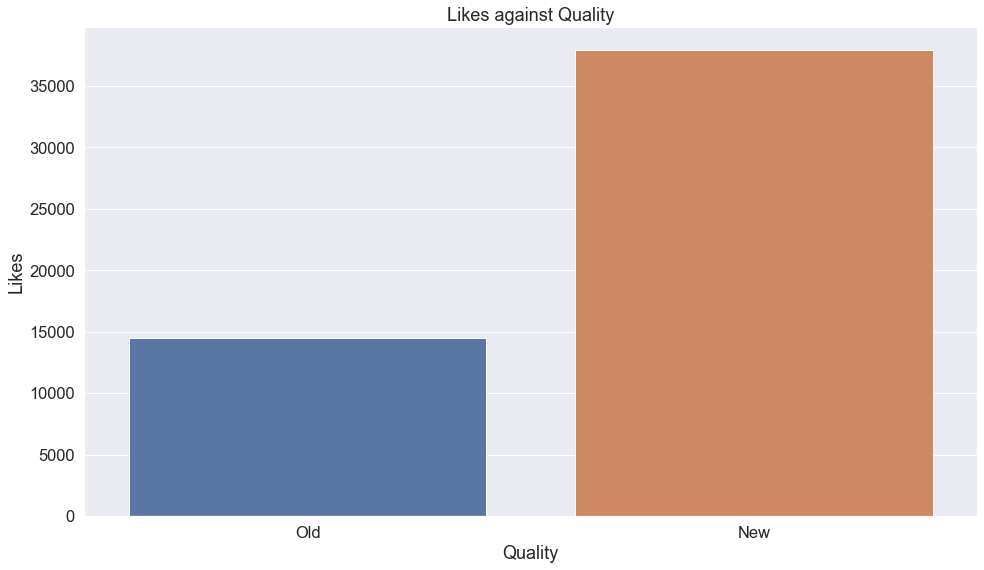

In [114]:
fig, ax = plt.subplots(figsize = (16,9))
sns.barplot(x = "Quality", y = "Likes", data = df_quality).set_title("Likes against Quality")
plt.show()

4) Analyse how price vary with likes. Not much of a correlation observed

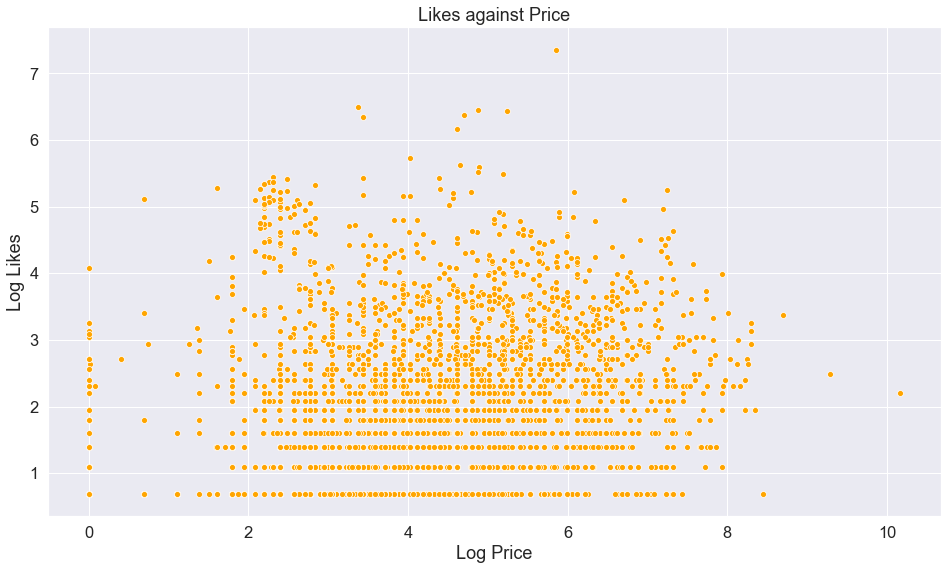

In [115]:
fig, ax = plt.subplots(figsize = (16,9))
sns.scatterplot(x = "Log Price", y = "Log Likes", data = df, color = "orange").set_title("Likes against Price")
plt.show()

5) Analyse how type of product varies across:

i) Price

In [50]:
df_groupby_cat_agg = df.groupby("Category").agg({"Price" : "mean", 
                                                 "Likes" : "mean", 
                                                 "Quality" : "mean"}).reset_index()

In [51]:
df_groupby_cat_agg.columns = ["Category", "Average Price", "Average Likes", "Average Quality"]

In [52]:
df_groupby_cat = df_groupby_cat.join(df_groupby_cat_agg.set_index("Category"), on = "Category")
df_groupby_cat.columns = ["Category", "Number of items", "Average Price", "Average Likes", "Average Quality"]

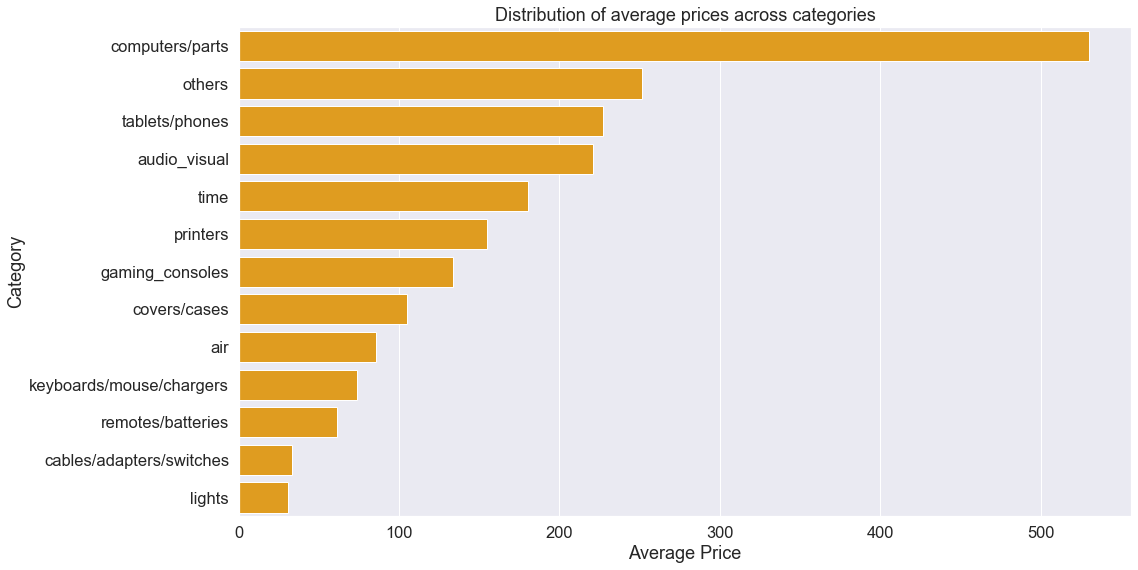

In [116]:
fig, ax = plt.subplots(figsize = (16,9))
sns.barplot(x = "Average Price", y = "Category", 
            data = df_groupby_cat.sort_values(by = "Average Price", ascending = False), 
            color = "orange").set_title("Distribution of average prices across categories")
plt.show()

ii) Quality

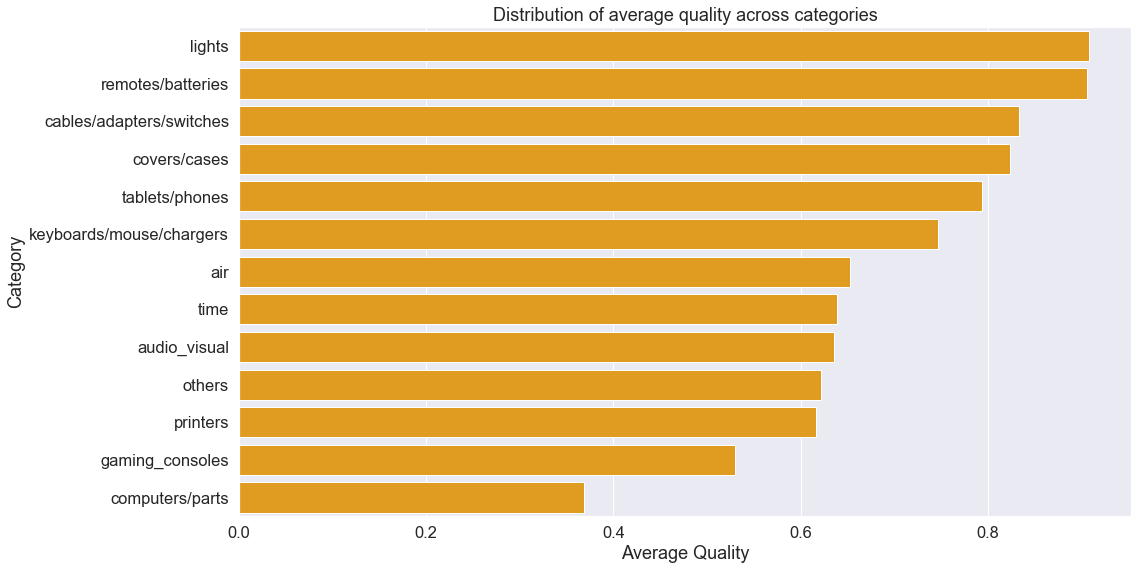

In [117]:
fig, ax = plt.subplots(figsize = (16,9))
sns.barplot(x = "Average Quality", y = "Category", 
            data = df_groupby_cat.sort_values(by = "Average Quality", ascending = False), 
            color = "orange").set_title("Distribution of average quality across categories")
plt.show()

iii) Likes

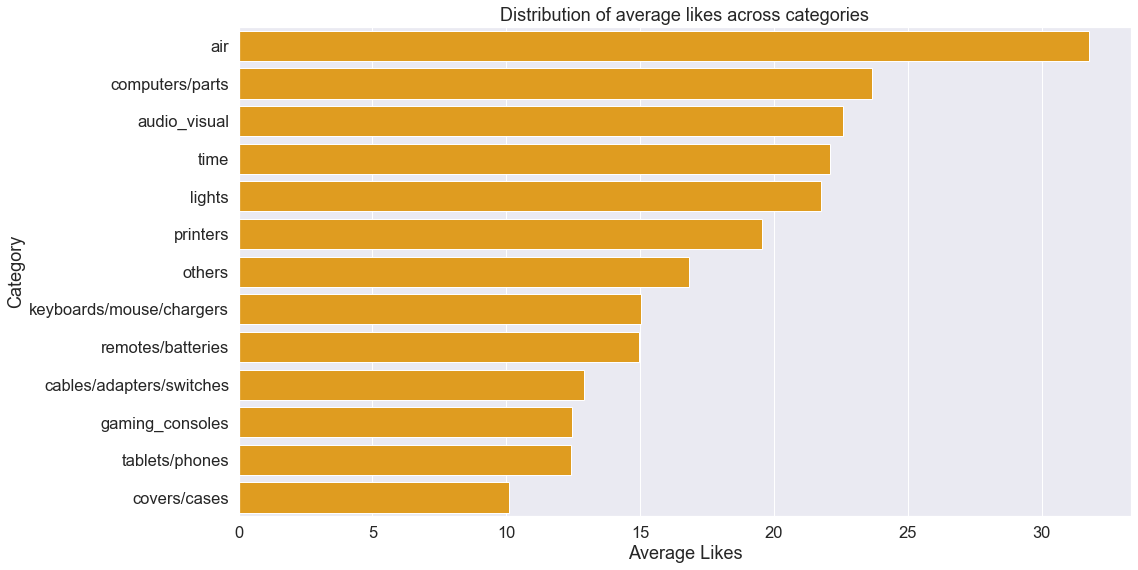

In [118]:
fig, ax = plt.subplots(figsize = (16,9))
sns.barplot(x = "Average Likes", y = "Category", 
            data = df_groupby_cat.sort_values(by = "Average Likes", ascending = False), 
            color = "orange").set_title("Distribution of average likes across categories")
plt.show()

# Modelling 
### Predict:
Let's explore to see how different types of regressors measure up against one another

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import json
import seaborn as sns 
import numpy as np 
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.corpus import stopwords
import scipy.sparse
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model # OLS
from sklearn import svm # SVM
from sklearn.gaussian_process import GaussianProcessRegressor # GPR
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel # GPR
from sklearn import tree # Decision Tree
from sklearn.neural_network import MLPRegressor # Neural Network
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.linear_model import SGDRegressor # Stochastic Gradient Descent
from sklearn.pipeline import make_pipeline # Stochastic Gradient Descent
from sklearn.preprocessing import StandardScaler # Stochastic Gradient Descent

In [2]:
df = pd.read_csv("data/carousell_3.csv", index_col = 0)

In [3]:
df.head()

,Seller,Product,Price,Quality,Likes,Comments,Category,Log Price,Log Likes
0,tonicboy,bn av cable,0.0,1,14,Others,cables/adapters/switches,0.0,2.708050
1,andysky,power adaptor 8 usb port,0.0,1,20,Preorder ✨✨✨✨✨ Selling at $39 Registered ma...,cables/adapters/switches,0.0,3.044522
2,clearsound,zu audio megular component video cable,0.0,0,2,"Zu Audio 1.5m component video cable, in good c...",cables/adapters/switches,0.0,1.098612
3,semplice,baymax room light,0.0,1,25,Room accessories for decoration,lights,0.0,3.258097
4,shamurai.san,sony original tablet power adaptor,0.0,0,1,Selling sony power adapter table working condi...,cables/adapters/switches,0.0,0.693147


In [4]:
vectorizer = TfidfVectorizer(stop_words = "english")

In [5]:
response = vectorizer.fit_transform(df["Product"])

In [6]:
features = vectorizer.get_feature_names()

In [7]:
vectorized_products = pd.DataFrame.sparse.from_spmatrix(response)
vectorized_products.columns  = features
# obtained vectorized products

In [8]:
dummied_category = pd.get_dummies(df["Category"])
# obtained dummied categories

In [9]:
dummied_category = dummied_category.rename(columns = {"air" : "aircon/fans", 
                                                       "lights" : "lightings",
                                                       "printers": "printers/toners",
                                                       "time" : "clocks/watches"})
# need to change column names since some column names like "lights" in dummied_category will conflict with 
# those in vectorized products

In [10]:
temp = pd.merge(vectorized_products, dummied_category, left_index = True, right_index = True)

In [11]:
model_data = pd.merge(df.iloc[:, 2:5], temp, left_index = True, right_index = True)
# modelling data processsed

In [13]:
traindf, testdf = train_test_split(model_data, test_size = 0.2, random_state = 42)

In [14]:
y_train, y_test = traindf.iloc[:, 0], testdf.iloc[:, 0]
x_train, x_test = traindf.iloc[:, 1:], testdf.iloc[:, 1:]
# obtained train test data

In [15]:
dummy_regressor = DummyRegressor(strategy = "mean")
dummy_regressor.fit(x_train, y_train)
predicted_dummy_y = dummy_regressor.predict(x_test)
dummy_rmse = mean_squared_error(y_test, predicted_dummy_y)
# baseline rmse for comparison

In [ ]:
# ordinary least squares regression 
ols_regressor = linear_model.LinearRegression()
ols_predicted_y = ols_regressor.fit(x_train, y_train).predict(x_test)
ols_rmse = mean_squared_error(y_test, ols_predicted_y)
# svm regression
svm_regressor = svm.SVR()
svm_predicted_y = svm_regressor.fit(x_train, y_train).predict(x_test)
svm_rmse = mean_squared_error(y_test, svm_predicted_y)
# gaussian process regression
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel = kernel, random_state = 0).fit(x_train, y_train)
gpr_predicted_y = gpr.predict(x_test)
gpr_rmse = mean_squared_error(y_test, gpr_predicted_y)
# decision tree regression
tree_regressor = tree.DecisionTreeRegressor()
tree_predicted_y = tree_regressor.fit(x_train, y_train).predict(x_test)
tree_rmse = mean_squared_error(y_test, tree_predicted_y)
# neural network regression
nn_regressor = MLPRegressor(random_state = 1, max_iter = 500)
nn_predicted_y = nn_regressor.fit(x_train, y_train).predict(x_test)
nn_rmse = mean_squared_error(y_test, nn_predicted_y)
# random forest regression
random_forest_rmses = {}
for n in range(1, 33):
    random_forest_regressor = RandomForestRegressor(max_depth = n, random_state = 0)
    random_forest_predicted_y = random_forest_regressor.fit(x_train, y_train).predict(x_test)
    random_forest_rmse = mean_squared_error(y_test, random_forest_predicted_y)
    random_forest_rmses[n] = random_forest_rmse
f = open("random_forest_rmses.json", "w")
json.dump(random_forest_rmses, f)
f.close()
random_forest_rmse = open("random_forest_rmses.json", "r")
random_forest_rmse = min(random_forest_rmses, key = random_forest_rmses.get)
# sgd regression
sgd_regressor = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgd_predicted_y = sgd_regressor.fit(x_train, y_train).predict(x_test)
sgd_rmse = mean_squared_error(y_test, sgd_predicted_y)

In [32]:
model_names = ["OLS", "SVM", "GPR", "Decision Tree", "Random Forest", "SGD"]
model_rmses = [ols_rmse, svm_rmse, gpr_rmse, tree_rmse, random_forest_rmse, sgd_rmse]
log_model_rmses = [np.log(rmse) for rmse in model_rmses]
model_performances = pd.DataFrame(list(zip(model_names, model_rmses, log_model_rmses)))
model_performances.columns = ["Model", "RMSE", "Log RMSE"]

In [55]:
model_performances.to_csv("data/model_performances.csv")

In [49]:
model_performances = pd.read_csv("data/model_performances.csv", index_col = 0)
model_performances.iat[4,0] = "Random Forest (depth = 24)"

In [57]:
# forgot to add in dummy oops
# dummy_performance = pd.DataFrame([["Dummy", dummy_rmse, np.log(dummy_rmse)]], columns = model_performances.columns)
# model_performances = model_performances.append(dummy_performance)

In [60]:
model_performances
model_performances.sort_values(by = "RMSE", ascending = True)

,Model,RMSE,Log RMSE
4,Random Forest (depth = 24),2.700000e+01,3.295837
3,Decision Tree,2.384041e+05,12.381722
2,GPR,2.431688e+05,12.401511
0,Dummy,2.435073e+05,12.402902
1,SVM,2.749289e+05,12.524268
0,OLS,1.664358e+22,51.166312
5,SGD,2.886893e+24,56.322223


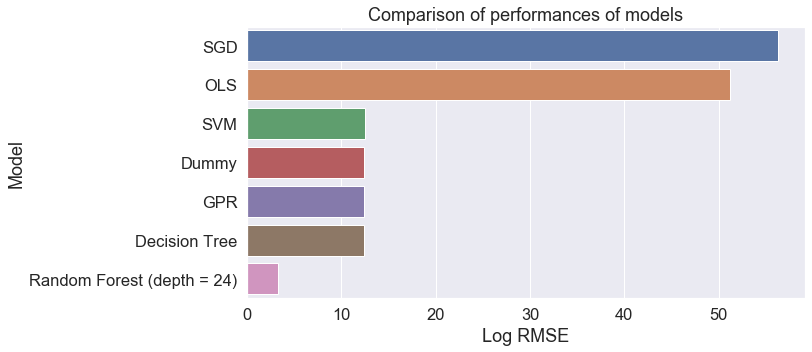

In [59]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(1, 1, figsize = (10,5))
sns.barplot(x = "Log RMSE", y = "Model", data = model_performances.
            sort_values(by = "Log RMSE", ascending = False)).set_title("Comparison of performances of models")
plt.show()